https://www.kaggle.com/code/msripooja/steps-to-convert-audio-clip-to-spectrogram

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import random
import numpy as np

# Set seeds for reproducibility
random.seed(34)
np.random.seed(34)

In [3]:
from utils import *

In [4]:
X_train, y_train = generate_dataset(directory='./TrainingData', MAX_LEN=170)

In [5]:
X_test, y_test = generate_dataset(directory='./TestingData', MAX_LEN=170)

In [6]:
X_train.shape

(120, 170, 33)

In [7]:
X_test.shape

(40, 170, 33)

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [10]:
model = models.Sequential([
    layers.Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [11]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=2e-3), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,  # Smaller batch size for small datasets
    validation_split=0.2,
    verbose=2
)

Epoch 1/50
6/6 - 1s - 117ms/step - accuracy: 0.5208 - loss: 0.7947 - val_accuracy: 0.0000e+00 - val_loss: 0.7387
Epoch 2/50
6/6 - 0s - 10ms/step - accuracy: 0.5938 - loss: 0.5838 - val_accuracy: 0.0000e+00 - val_loss: 0.6342
Epoch 3/50
6/6 - 0s - 9ms/step - accuracy: 0.5938 - loss: 0.4551 - val_accuracy: 0.0000e+00 - val_loss: 0.4995
Epoch 4/50
6/6 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.3774 - val_accuracy: 0.0000e+00 - val_loss: 0.5238
Epoch 5/50
6/6 - 0s - 9ms/step - accuracy: 0.5833 - loss: 0.3408 - val_accuracy: 0.0000e+00 - val_loss: 0.4264
Epoch 6/50
6/6 - 0s - 9ms/step - accuracy: 0.6042 - loss: 0.3228 - val_accuracy: 0.0000e+00 - val_loss: 0.4277
Epoch 7/50
6/6 - 0s - 9ms/step - accuracy: 0.6250 - loss: 0.2920 - val_accuracy: 0.0000e+00 - val_loss: 0.4356
Epoch 8/50
6/6 - 0s - 9ms/step - accuracy: 0.6458 - loss: 0.2746 - val_accuracy: 0.0000e+00 - val_loss: 0.4541
Epoch 9/50
6/6 - 0s - 9ms/step - accuracy: 0.6354 - loss: 0.2594 - val_accuracy: 0.1667 - val_loss: 0.3650
Ep

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7937 - loss: 0.1702
Test Accuracy: 0.80


In [13]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int) 

print("\nClassification Report:\n", classification_report(y_test, y_pred_binary))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.77      0.85      0.81        20

    accuracy                           0.80        40
   macro avg       0.80      0.80      0.80        40
weighted avg       0.80      0.80      0.80        40



In [14]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Loss vs Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

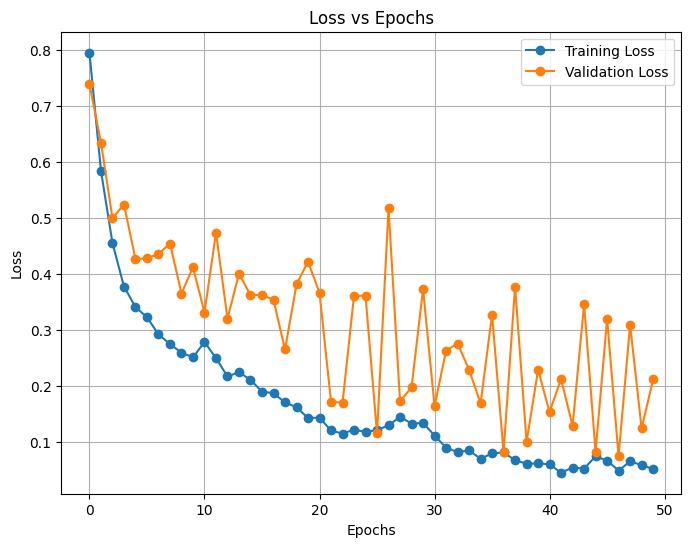

In [15]:
plot_training_history(history)

In [16]:
X_train

array([[[-5.65639574,  0.16969872,  0.16969872, ...,  0.16982441,
          0.16954271,  0.16971652],
        [-5.65639591,  0.16969447,  0.16969447, ...,  0.16979055,
          0.16954825,  0.16971861],
        [-5.65639607,  0.16969058,  0.16969058, ...,  0.16975529,
          0.16955694,  0.16972498],
        ...,
        [-1.5600525 ,  0.03928   , -0.046417  , ..., -0.14053092,
         -0.14044258, -0.14047146],
        [-1.72454938,  0.06580477, -0.03474567, ..., -0.1362321 ,
         -0.13614004, -0.13615863],
        [-1.76889392,  0.07811435, -0.02458335, ..., -0.13615153,
         -0.13607258, -0.13607775]],

       [[-5.65672916,  0.17179832,  0.17179832, ...,  0.17194687,
          0.17175718,  0.17160692],
        [-5.65672911,  0.17180024,  0.17180024, ...,  0.17193045,
          0.171773  ,  0.17161352],
        [-5.65672906,  0.17180241,  0.17180241, ...,  0.17190959,
          0.17178905,  0.17161977],
        ...,
        [-1.50929713,  0.0442252 , -0.0684464 , ..., -